Dataset preview:
   followers  following  posts  engagement  account_age  label
0        901        914   1616   26.034854         2553      0
1       7741       5217   1473   32.249044          365      1
2       6549       7701   1116   24.248285         2749      0
3       4394       6940   1772   47.986340          392      0
4       4335       2196    256   68.325836          186      1

Performance Metrics:
Accuracy : 0.620
Precision: 0.143
Recall   : 0.030
F1 Score : 0.050
AUC      : 0.491


C:\Users\parth\AppData\Local\Temp\ipykernel_17056\3887463404.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=dataset, palette="Set2", ax=axes[1, 0])
C:\Users\parth\AppData\Local\Temp\ipykernel_17056\3887463404.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(["Genuine", "Fake"])


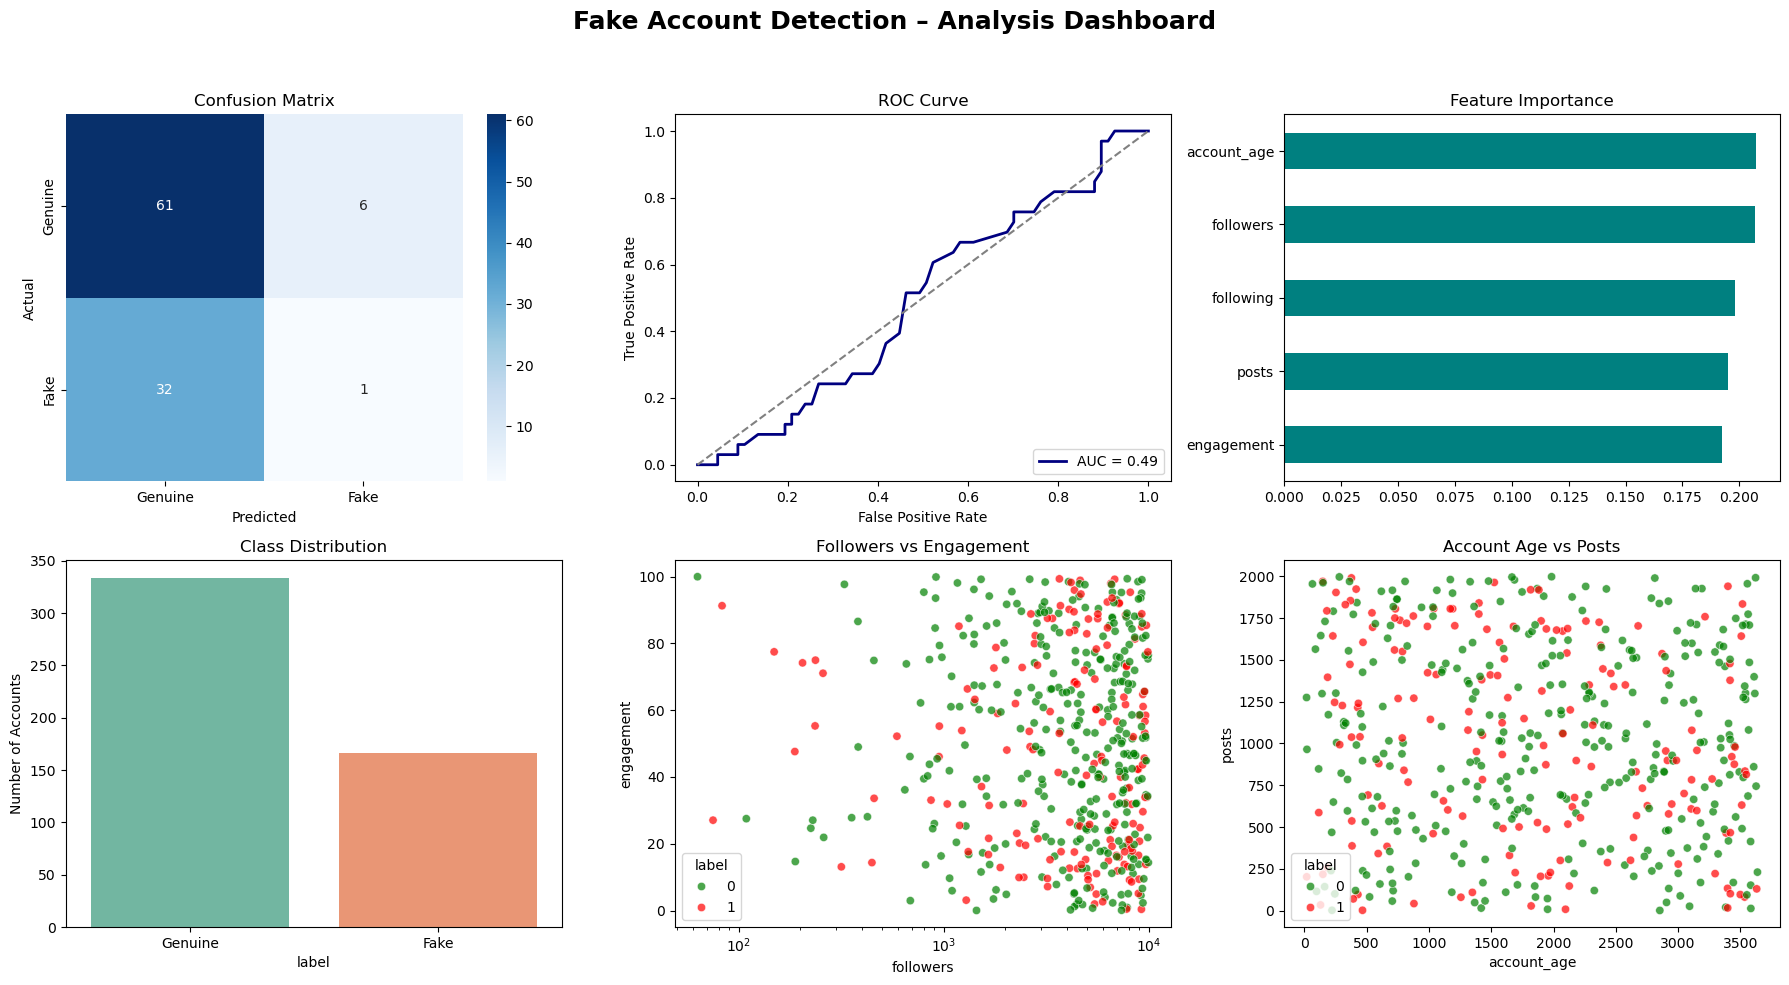

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ( accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc)
try:
    dataset = pd.read_csv("fake_accounts.csv")
except FileNotFoundError:
    rng = np.random.default_rng(42)
    dataset = pd.DataFrame({
        "followers": rng.integers(10, 10000, size=500),
        "following": rng.integers(5, 8000, size=500),
        "posts": rng.integers(0, 2000, size=500),
        "engagement": rng.random(500) * 100,
        "account_age": rng.integers(1, 3650, size=500),
        "label": rng.choice([0, 1], size=500, p=[0.7, 0.3])
    })
print("Dataset preview:")
print(dataset.head())
X = dataset.drop(columns="label")
y = dataset["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
rf_clf = RandomForestClassifier( n_estimators=150, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
y_score = rf_clf.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("\nPerformance Metrics:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1 Score : {f1:.3f}")
print(f"AUC      : {roc_auc:.3f}")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Fake Account Detection – Analysis Dashboard", fontsize=18, fontweight="bold")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Genuine", "Fake"],
            yticklabels=["Genuine", "Fake"],
            ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")
axes[0, 1].plot(fpr, tpr, color="navy", lw=2, label=f"AUC = {roc_auc:.2f}")
axes[0, 1].plot([0, 1], [0, 1], linestyle="--", color="gray")
axes[0, 1].set_title("ROC Curve")
axes[0, 1].set_xlabel("False Positive Rate")
axes[0, 1].set_ylabel("True Positive Rate")
axes[0, 1].legend(loc="lower right")
importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", color="teal", ax=axes[0, 2])
axes[0, 2].set_title("Feature Importance")
sns.countplot(x="label", data=dataset, palette="Set2", ax=axes[1, 0])
axes[1, 0].set_xticklabels(["Genuine", "Fake"])
axes[1, 0].set_title("Class Distribution")
axes[1, 0].set_ylabel("Number of Accounts")
sns.scatterplot(data=dataset, x="followers", y="engagement",
                hue="label", palette={0: "green", 1: "red"},
                alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_title("Followers vs Engagement")
axes[1, 1].set_xscale("log")
sns.scatterplot(data=dataset, x="account_age", y="posts",
                hue="label", palette={0: "green", 1: "red"},
                alpha=0.7, ax=axes[1, 2])
axes[1, 2].set_title("Account Age vs Posts")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
